## Import Files and Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('BAJFINANCE.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## EDA

In [3]:
df.shape

(5070, 15)

In [4]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

## Feature Engineering

### Predict Missing "Trades" Datas

In [6]:
dataT = df.copy()

In [7]:
del dataT['Date']
del dataT['Symbol']
del dataT['Series']
del dataT['Deliverable Volume']
del dataT['%Deliverble']

In [8]:
dataT.isnull().sum()

Prev Close       0
Open             0
High             0
Low              0
Last             0
Close            0
VWAP             0
Volume           0
Turnover         0
Trades        2779
dtype: int64

In [9]:
missing = dataT[dataT['Trades'].isnull()]
filled = dataT[dataT['Trades'].notnull()]

In [10]:
missing.shape, filled.shape

((2779, 10), (2291, 10))

In [11]:
X = filled

In [12]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [13]:
L.fit(X.drop('Trades' , axis=1), X.Trades)

LinearRegression()

In [14]:
pred = L.predict(X.drop('Trades', axis=1))
pred

array([-6.01006063e+02,  2.68782574e+02,  1.61029729e+03, ...,
        1.79856685e+05,  1.63078970e+05,  3.59032361e+05])

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(X['Trades'], pred)

0.9271819337201196

In [16]:
mean_squared_error(X['Trades'], pred) ** .5

27387.46390824341

In [17]:
pred.shape

(2291,)

In [18]:
Trades = pd.DataFrame()
Trades['Trades'] = pred

In [19]:
Trades.shape

(2291, 1)

In [20]:
missing.shape

(2779, 10)

In [21]:
missing.isna().sum()

Prev Close       0
Open             0
High             0
Low              0
Last             0
Close            0
VWAP             0
Volume           0
Turnover         0
Trades        2779
dtype: int64

In [22]:
missing.loc[:, 'Trades'] = Trades

C:\Users\ataka\anaconda3\lib\site-packages\pandas\core\indexing.py:1786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [23]:
missing.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,-601.006063
1,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,268.782574
2,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,1610.297288
3,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,854.437426
4,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,-151.646084


In [24]:
missing.isna().sum()

Prev Close      0
Open            0
High            0
Low             0
Last            0
Close           0
VWAP            0
Volume          0
Turnover        0
Trades        488
dtype: int64

In [25]:
result = missing.append(filled)

In [26]:
result.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,-601.006063
1,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,268.782574
2,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,1610.297288
3,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,854.437426
4,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,-151.646084


In [27]:
result.isnull().sum()

Prev Close      0
Open            0
High            0
Low             0
Last            0
Close           0
VWAP            0
Volume          0
Turnover        0
Trades        488
dtype: int64

In [28]:
result.dropna(inplace=True)

In [29]:
result.isnull().sum()

Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
Trades        0
dtype: int64

In [30]:
missing2 = missing[missing['Trades'].isnull()]

In [31]:
missing2.shape, result.shape

((488, 10), (4582, 10))

In [32]:
X = result

In [33]:
L.fit(X.drop('Trades' , axis=1), X.Trades)

LinearRegression()

In [34]:
pred2 = L.predict(X.drop('Trades', axis=1))
pred2

array([ 35429.71850084,  35711.07099936,  35219.0779128 , ...,
       186959.96088537, 170395.66465052, 372001.38166604])

In [35]:
r2_score(X['Trades'], pred2)

0.4538817583230348

In [36]:
mean_squared_error(X['Trades'], pred2) ** .5

73628.02307475053

In [37]:
Trades2 = pd.DataFrame()
Trades2['Trades'] = pred2

In [38]:
Trades2.shape

(4582, 1)

In [39]:
missing2.loc[:, 'Trades'] = Trades2

C:\Users\ataka\anaconda3\lib\site-packages\pandas\core\indexing.py:1786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [40]:
missing2.isnull().sum()

Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
Trades        0
dtype: int64

In [41]:
missing.shape

(2779, 10)

In [42]:
resultFinal = missing2.append(result)

In [43]:
resultFinal.shape

(5070, 10)

In [44]:
df['Trades'] = resultFinal['Trades']

In [45]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume    446
%Deliverble           446
dtype: int64

### Predict Missing "Deliverable Volume" Datas

In [46]:
dataD = df.copy()

In [47]:
del dataD['Date']
del dataD['Symbol']
del dataD['Series']
del dataD['%Deliverble']

In [48]:
dataD.isnull().sum()

Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume    446
dtype: int64

In [49]:
missing = dataD[dataD['Deliverable Volume'].isnull()]
filled = dataD[dataD['Deliverable Volume'].notnull()]

In [50]:
missing.shape, filled.shape

((446, 11), (4624, 11))

In [51]:
X = filled

In [52]:
L.fit(X.drop('Deliverable Volume' , axis=1), X['Deliverable Volume'])

LinearRegression()

In [53]:
predD = L.predict(X.drop('Trades', axis=1))
predD

array([  19355.57791802,   20045.1866362 ,   19652.20751594, ...,
        516543.19024378,  467438.45383249, 1136273.01171264])

In [54]:
r2_score(X['Deliverable Volume'], predD)

0.8121745907704923

In [55]:
mean_squared_error(X['Deliverable Volume'], predD) ** .5

151491.62742228303

In [56]:
predD.shape

(4624,)

In [57]:
Deliv = pd.DataFrame()
Deliv['Deliverable Volume'] = predD

In [58]:
missing.isna().sum()

Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume    446
dtype: int64

In [59]:
missing.loc[:, 'Deliverable Volume'] = Deliv

C:\Users\ataka\anaconda3\lib\site-packages\pandas\core\indexing.py:1786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [60]:
missing.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,-601.006063,19355.577918
1,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,268.782574,20045.186636
2,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,1610.297288,19652.207516
3,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,854.437426,18994.830141
4,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,-151.646084,19130.937572


In [61]:
missing.isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
dtype: int64

In [62]:
missing.shape

(446, 11)

In [63]:
filled.shape

(4624, 11)

In [64]:
resultD = missing.append(filled)

In [65]:
resultD.isnull().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
dtype: int64

In [66]:
resultD.shape

(5070, 11)

In [67]:
df['Deliverable Volume'] = resultD['Deliverable Volume']

In [68]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume      0
%Deliverble           446
dtype: int64

### Predict Missing "%Deliverble" Datas

In [69]:
dataB = df.copy()

In [70]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [71]:
dataB.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume      0
%Deliverble           446
dtype: int64

In [72]:
del dataB['Date']
del dataB['Symbol']
del dataB['Series']

In [73]:
missing = dataB[dataB['%Deliverble'].isnull()]
filled = dataB[dataB['%Deliverble'].notnull()]

In [74]:
missing.shape, filled.shape

((446, 12), (4624, 12))

In [75]:
X = filled

In [76]:
L.fit(X.drop('%Deliverble' , axis=1), X['%Deliverble'])

LinearRegression()

In [77]:
predB = L.predict(X.drop('%Deliverble', axis=1))
predB

array([0.74828466, 0.74866659, 0.74902395, ..., 0.38564552, 0.39130347,
       0.17449228])

In [78]:
r2_score(X['%Deliverble'], predB)

0.38583723308390594

In [79]:
mean_squared_error(X['%Deliverble'], predB) ** .5

0.18298798049237144

In [80]:
predB.shape

(4624,)

In [81]:
Delvi = pd.DataFrame()
Delvi['%Deliverble'] = predB

In [82]:
missing.isna().sum()

Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume      0
%Deliverble           446
dtype: int64

In [83]:
missing.loc[:, '%Deliverble'] = Delvi

C:\Users\ataka\anaconda3\lib\site-packages\pandas\core\indexing.py:1786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [84]:
missing.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,-601.006063,19355.577918,0.748285
1,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,268.782574,20045.186636,0.748667
2,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,1610.297288,19652.207516,0.749024
3,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,854.437426,18994.830141,0.749029
4,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,-151.646084,19130.937572,0.748692


In [85]:
missing.isna().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [86]:
missing.shape

(446, 12)

In [87]:
filled.shape

(4624, 12)

In [88]:
resultB = missing.append(filled)

In [89]:
resultB.isnull().sum()

Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [90]:
resultB.shape

(5070, 12)

In [91]:
df['%Deliverble'] = resultB['%Deliverble']

In [92]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

# Time Series

### Data Pre-Processing

In [93]:
df.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

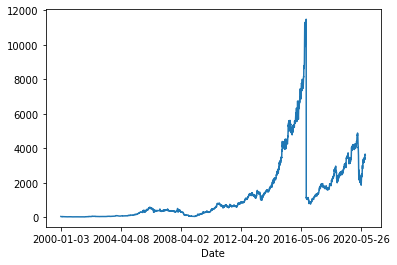

In [94]:
df['VWAP'].plot()

In [95]:
data = df.copy()

In [96]:
data.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [97]:
data.shape

(5070, 14)

In [98]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [99]:
for feature in lag_features:
    data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [100]:
for feature in lag_features:
    data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [101]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,1114.006023,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,672.554516,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,...,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,883.928033,NaN


In [102]:
data.shape

(5070, 34)

In [103]:
data.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [104]:
data.dropna(inplace=True)

In [105]:
data.shape # We lossed just 6 rows data

(5064, 34)

In [106]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [107]:
features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [108]:
training_data=data[0:4600] # 4600 data --> training
test_data=data[4600:]      #  464 data --> test   

In [109]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.50,40.25,40.10,40.25,5500,...,3.000556,3.709528,1.258306,3.052712,1.006645e+03,1.466125e+03,3.353967e+09,7.780466e+09,1018.388770,922.627509
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.00,39.00,39.00,39.80,1000,...,2.463737,4.300664,1.040833,3.087610,2.400694e+03,1.722401e+03,9.915353e+09,7.711740e+09,1199.705793,1248.404555
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.50,39.50,39.50,39.37,1000,...,1.000000,3.191880,0.500000,2.146980,2.598076e+03,2.045902e+03,1.049654e+10,8.903806e+09,2330.438661,1490.386860
2000-01-14,BAJAUTOFIN,EQ,39.50,39.00,40.50,39.00,39.90,39.90,39.72,1700,...,0.500000,3.097849,0.288675,1.513117,4.041452e+02,2.173871e+03,1.612971e+09,9.499372e+09,2519.664061,1573.049727
2000-01-17,BAJAUTOFIN,EQ,39.90,39.05,41.00,38.40,39.20,39.20,39.84,3100,...,0.288675,2.915721,0.321455,1.359797,1.069268e+03,1.782053e+03,4.282258e+09,7.480525e+09,1541.476551,1622.908073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-08,BAJFINANCE,EQ,2023.30,1992.00,2090.00,1912.20,1962.00,1974.85,2005.81,5966669,...,71.199157,80.587711,107.474427,104.231088,1.314761e+06,1.147205e+06,2.386587e+14,2.343819e+14,66741.722730,45236.268653
2018-10-09,BAJFINANCE,EQ,1974.85,1975.00,2115.85,1947.65,2061.00,2060.85,2031.07,4859016,...,65.758326,81.207727,26.160291,99.068240,1.250746e+06,9.246431e+05,2.321252e+14,1.912872e+14,57876.046505,40449.149504
2018-10-10,BAJFINANCE,EQ,2060.85,2100.00,2305.70,2100.00,2256.95,2270.95,2241.29,7235957,...,117.783513,88.731615,99.779812,97.041017,1.189386e+06,1.259627e+06,3.234593e+14,2.925131e+14,50674.357029,55898.219626


### ARIMA MODEL

In [110]:
!pip install pmdarima

You should consider upgrading via the 'c:\users\ataka\anaconda3\python.exe -m pip install --upgrade pip' command.


In [111]:
from pmdarima import auto_arima

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
model = auto_arima(y=training_data['VWAP'],exogenous=training_data[features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=49256.540, Time=5.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=49252.385, Time=3.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=49254.017, Time=3.61 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=49254.010, Time=4.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=83447.309, Time=3.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=49256.416, Time=4.93 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 25.554 seconds


In [114]:
model.fit(training_data['VWAP'],training_data[features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [115]:
forecast = model.predict(n_periods=len(test_data), exogenous=test_data[features])

In [116]:
test_data['Forecast_ARIMA']=forecast

<AxesSubplot:xlabel='Date'>

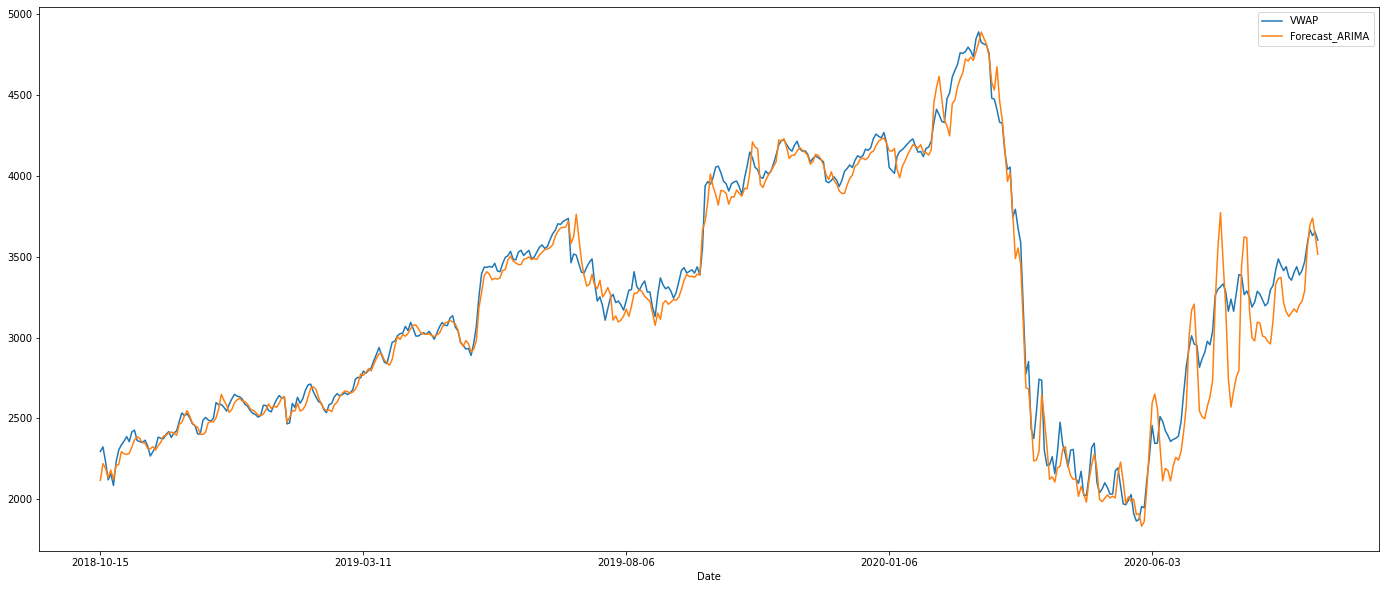

In [117]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(24,10))

### Checking Accuracy Score of our model

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [119]:
print("Root Mean Squarred Error:", np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA'])))

Root Mean Squarred Error: 125.16810984805572


In [120]:
print("Mean Absolute Error:", mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

Mean Absolute Error: 82.7710029507968
